<a href="https://colab.research.google.com/github/vahid-am/AI-Projects/blob/main/Qiskit_Intro_Quantum_Programing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Qiskit**

In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.7 MB/s eta 0:00:00


# **The QuantumCircuit class**

The QuantumCircuit class is the core object of quantum programing in Qiskit.
In Qiskit, quantum algorithms are constructed using the QuantumCircuit class. A QuantumCircuit represents a quantum computation as an ordered sequence of quantum operations (gates) acting on a set of qubits, followed optionally by measurements.

When creating a circuit, we must specify how many quantum bits (qubits) and classical bits it contains. Qubits store quantum information and evolve according to quantum gates, while classical bits store the outcomes of measurements.

"from qiskit import QuantumCircuit"

#General form:

QuantumCircuit(
    *regs,
    name=None,
    global_phase=0,
    metadata=None,
    inputs=(),
    captures=(),
    declarations=()
)

*regs : is a list of registers or integers, specifing qubits and classical bits used in the quantum circuit.

name: Circuit Name (OPTIONAL)

global_phase: Including Overall Phase to the circuit, which is physically unobservable and usually ignored. However, somtimes becpme usful for gate composition and compilers.
$$
\newcommand{\ket}[1]{\lvert #1 \rangle}
$$
$$
\ket{\psi} \rightarrow e^{i\phi}\ket{\psi}
$$

metadata, inputs, captures, declarations: provid advanced features and extra information that can be safely ignored in intoductory courses.

# Commonly Used:

QuantumCircuit(n_qubits, n_clbits)

QuantumCircuit(n_qubits, m_clbits, name="Example")


In [2]:
from qiskit import QuantumCircuit
import numpy as np

In [3]:
# Create a 3-qubit, 2-classical-bit circuit
qc = QuantumCircuit(
    3, 2,                        # 3 qubits, 2 classical bits
    name="BellCircuit",           # optional name
    global_phase=np.pi/4,         # global phase (does not affect measurement)
    metadata={"topic": "entanglement"}
)

# --- Apply gates ---
qc.h(0)           # Hadamard on qubit 0 → puts it into superposition
qc.cx(0, 1)       # CNOT: qubit 0 (control) → qubit 1 (target), creates entanglement

qc.h(2)           # Hadamard on qubit 2 → puts qubit 2 in superposition
qc.t(2)           # T-gate (π/4 rotation) on qubit 2
qc.h(2)           # Another Hadamard on qubit 2
qc.t(2)           # Another T-gate on qubit 2
qc.cx(1, 2)       # CNOT: qubit 1 (control) → qubit 2 (target)

# --- Measurement ---
qc.measure([0, 1], [1, 0])
# Maps qubit 0 → classical bit 1
# Maps qubit 1 → classical bit 0
# Qubit 2 is NOT measured

# Draw the circuit
qc.draw()


global phase: π/4
     ┌───┐          ┌─┐             
q_0: ┤ H ├──■───────┤M├─────────────
     └───┘┌─┴─┐     └╥┘          ┌─┐
q_1: ─────┤ X ├──────╫────────■──┤M├
     ┌───┐├───┤┌───┐ ║ ┌───┐┌─┴─┐└╥┘
q_2: ┤ H ├┤ T ├┤ H ├─╫─┤ T ├┤ X ├─╫─
     └───┘└───┘└───┘ ║ └───┘└───┘ ║ 
c: 2/════════════════╩════════════╩═
                     1            0

In [4]:
from qiskit import QuantumCircuit
from math import pi
from IPython.display import display

# Define control and target qubits
c = 0
t = 1

# =====================
# 1. Swap gate
# =====================
qc1 = QuantumCircuit(2)
qc1.swap(c, t)
display(qc1.draw())
# Explanation:
# SWAP exchanges the states of qubit c (control) and qubit t (target)
# If qubit 0 was |0> and qubit t was |1>, after SWAP, qubit 0 → |1>, qubit 1 → |0>

# =====================
# 2.  Controlled-Z
# =====================
qc2 = QuantumCircuit(2)
qc2.cz(c, t)
display(qc2.draw())
# Explanation:
# CZ applies a Z gate on the target qubit (qubit t) ONLY if the control qubit (qubit c) is |1>
# It flips the phase of |11> state (|11> → -|11>), leaving other states unchanged

# =====================
# 3.  Controlled-Z via H-CX-H
# =====================
qc3 = QuantumCircuit(2)
qc3.h(t)
qc3.cx(c, t)
qc3.h(t)
display(qc3.draw())
# Explanation:
# Equivalent to Controlled-Z, implemented using H and CX:
# H converts Z-basis to X-basis, CX flips target if control is |1>, H converts back
# Useful for decomposition of gates

# =====================
# 4.  Controlled-Y
# =====================
qc4 = QuantumCircuit(2)
qc4.sdg(t)        # S† on target
qc4.cx(c, t)
qc4.s(t)          # S on target
display(qc4.draw())
# Explanation:
# Applies a Controlled-Y gate
# The sequence S† → CX → S implements Y gate conditionally:
# - Qubit t (target) gets a Y rotation if qubit c (control) is |1>

# =====================
# 5.  Controlled-RY (as Controlled-H)
# =====================
qc5 = QuantumCircuit(2)
qc5.ry(pi/4, t)
qc5.cx(c, t)
qc5.ry(-pi/4, t)
display(qc5.draw())
# Explanation:
# This sequence implements a controlled rotation around the Y-axis
# If control qubit is |1>, target qubit undergoes RY(π/2) rotation
# This is a way to implement a “Controlled-Hadamard” approximately

# =====================
# 6. Controlled-RY(arbitrary angle)
# =====================
qc6 = QuantumCircuit(2)
theta = pi  # arbitrary angle for rotation
qc6.ry(theta/2, t)
qc6.cx(c, t)
qc6.ry(-theta/2, t)
qc6.cx(c, t)
display(qc6.draw())
# Explanation:
# This is a general controlled rotation using the "R_y sandwich" trick
# - First RY(theta/2) on target
# - CX to entangle with control
# - RY(-theta/2) to undo if control is |0>
# - CX to restore
# Effect: target qubit rotates by theta if control qubit is |1>


q_0: ─X─
      │ 
q_1: ─X─

q_0: ─■─
      │ 
q_1: ─■─

q_0: ───────■───────
     ┌───┐┌─┴─┐┌───┐
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

q_0: ─────────■───────
     ┌─────┐┌─┴─┐┌───┐
q_1: ┤ Sdg ├┤ X ├┤ S ├
     └─────┘└───┘└───┘

q_0: ─────────────■──────────────
     ┌─────────┐┌─┴─┐┌──────────┐
q_1: ┤ Ry(π/4) ├┤ X ├┤ Ry(-π/4) ├
     └─────────┘└───┘└──────────┘

q_0: ─────────────■────────────────■──
     ┌─────────┐┌─┴─┐┌──────────┐┌─┴─┐
q_1: ┤ Ry(π/2) ├┤ X ├┤ Ry(-π/2) ├┤ X ├
     └─────────┘└───┘└──────────┘└───┘

In [5]:
# Create a new circuit to hold all gates
combined = QuantumCircuit(2)

# Convert each circuit to a gate and append
combined.append(qc1.to_gate(label="SWAP"), [c, t])
combined.append(qc2.to_gate(label="CZ"), [c, t])
combined.append(qc3.to_gate(label="CZ_H"), [c, t])
combined.append(qc4.to_gate(label="CY"), [c, t])
combined.append(qc5.to_gate(label="CY_H"), [c, t])
combined.append(qc6.to_gate(label="CY_AA"), [c, t])

# Draw the combined circuit
combined.draw()

┌───────┐┌─────┐┌───────┐┌─────┐┌───────┐┌────────┐
q_0: ┤0      ├┤0    ├┤0      ├┤0    ├┤0      ├┤0       ├
     │  SWAP ││  CZ ││  CZ_H ││  CY ││  CY_H ││  CY_AA │
q_1: ┤1      ├┤1    ├┤1      ├┤1    ├┤1      ├┤1       ├
     └───────┘└─────┘└───────┘└─────┘└───────┘└────────┘

### Z-Y Decomposition of Single Qubit Gate

An arbitrary single qubit gate is a rotation of a qubit around an **arbitrary axis** $\hat{n} = (n_x, n_y, n_z)$ by an angle $\theta$ defined as:

$$
R_{\hat{n}}(\theta) = e^{-i \frac{\theta}{2} (n_x X + n_y Y + n_z Z)}
$$

This can be **decomposed into Euler angles**:

$$
R_{\hat{n}}(\theta) = R_z(\alpha)\, R_y(\beta)\, R_z(\gamma)
$$

where $\alpha$, $\beta$, $\gamma$ are chosen to align the $Z$-axis with $\hat{n}$.

---
### Controlled Rotation Trick ("U–CX–U†–CX")

The **controlled version** of $R_{\hat{n}}(\theta)$ can be implemented using the **CX sandwich method**:

$$
CR_{\hat{n}}(\theta) = U \cdot CX \cdot U^\dagger \cdot CX
$$

where

$$
U = R_z(\alpha)\, R_y(\beta)\, R_z(\gamma)
$$

**How it works:**

1. Rotate the target qubit so that the arbitrary axis $\hat{n}$ aligns with the $Z$-axis ($U$).  
2. Apply the **CX–U†–CX** sandwich to implement a controlled rotation along Z.  
3. Rotate back to the original axis ($U^\dagger$).  

✅ Result:

- Control qubit $|0\rangle$ → target unchanged  
- Control qubit $|1\rangle$ → target rotated by $\theta$ around $\hat{n}$

---

### Representing an Arbitrary Axis in Spherical Coordinates

Any unit vector (axis) in 3D can be written as:

$$\hat{n} = (n_x, n_y, n_z)$$

This vector can be expressed in **spherical coordinates**:

$$
n_x = \sin\beta \, \cos\alpha, \quad
n_y = \sin\beta \, \sin\alpha, \quad
n_z = \cos\beta
$$

where:

- $\beta$ is the polar angle (angle from the Z-axis)  
- $\alpha$ is the azimuthal angle (angle in the XY-plane from the X-axis)  

---

### Computing the angles

From the above relations, we can compute:

$$
\beta = \arccos(n_z)
$$

$$
\alpha = \arctan2(n_y, n_x)
$$

$\gamma$ is an additional rotation around Z. In general, any
$\gamma$ works as long as $^\dagger$ is applied in the controlled sandwich. it is often chosen as $\gamma = 0$, which simplifies the construction of the rotation gate U that aligns $\hat{n}$ with the Z-axis.


In [6]:
from qiskit import QuantumCircuit
import numpy as np
from IPython.display import display

# Control and target
c = 0
t = 1

# Arbitrary axis vector (unit vector)
nx, ny, nz = 1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)
theta = np.pi / 2  # rotation angle

# 1️⃣ Compute Euler angles to align Z-axis with n
beta = np.arccos(nz)
alpha = np.arctan2(ny, nx)
gamma = 0  # simplest choice

# =====================
# 2️⃣ U gate (single-qubit rotation)
# =====================
qc_U = QuantumCircuit(1, name="U")
qc_U.rz(alpha, 0)
qc_U.ry(beta, 0)
qc_U.rz(gamma, 0)

display(qc_U.draw())

# =====================
# 3️⃣ Controlled-U (controlled rotation using sandwich trick)
# =====================
qc_cU = QuantumCircuit(2, name="Controlled-U")

# Apply U on target
qc_cU.rz(alpha, t)
qc_cU.ry(beta, t)
qc_cU.rz(gamma, t)

# Sandwich trick for controlled rotation
qc_cU.cx(c, t)
qc_cU.rz(-gamma, t)
qc_cU.ry(-beta, t)
qc_cU.rz(-alpha, t)
qc_cU.cx(c, t)

display(qc_cU.draw())




┌─────────┐┌─────────────┐┌───────┐
q: ┤ Rz(π/4) ├┤ Ry(0.95532) ├┤ Rz(0) ├
   └─────────┘└─────────────┘└───────┘

»
q_0: ─────────────────────────────────────■───────────────────────────»
     ┌─────────┐┌─────────────┐┌───────┐┌─┴─┐┌───────┐┌──────────────┐»
q_1: ┤ Rz(π/4) ├┤ Ry(0.95532) ├┤ Rz(0) ├┤ X ├┤ Rz(0) ├┤ Ry(-0.95532) ├»
     └─────────┘└─────────────┘└───────┘└───┘└───────┘└──────────────┘»
«                      
«q_0: ──────────────■──
«     ┌──────────┐┌─┴─┐
«q_1: ┤ Rz(-π/4) ├┤ X ├
«     └──────────┘└───┘

# **Implementation of the Toffoli gate**

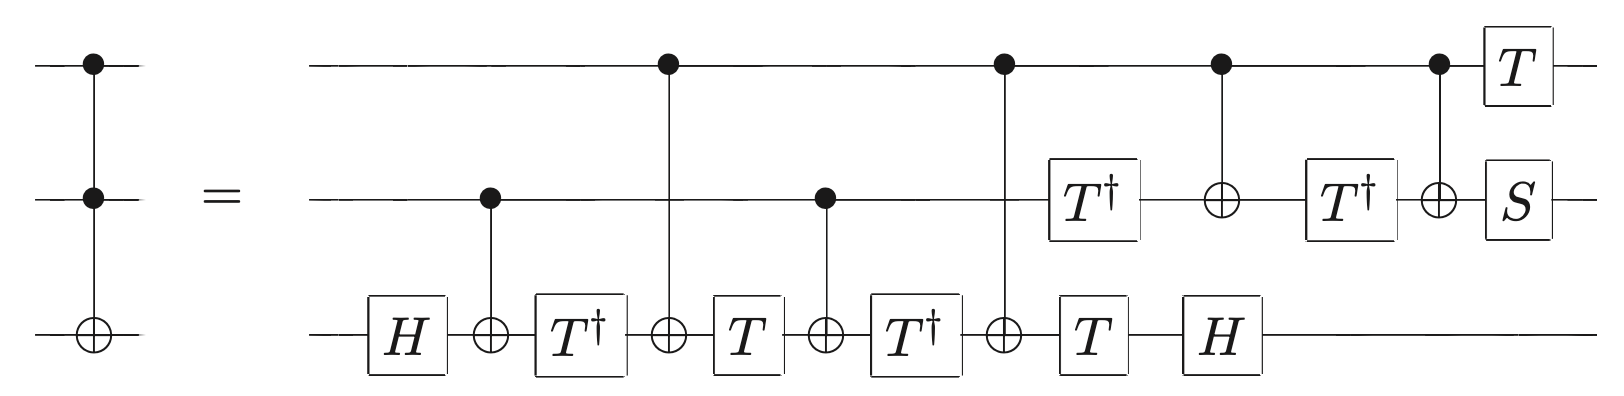

In [7]:
from qiskit import QuantumCircuit
from IPython.display import display

# =====================
# 1. Define sub-circuit
# =====================
def circuit_sub():
    qc = QuantumCircuit(2, name="SUB")
    qc.h(0)
    qc.cx(0, 1)
    return qc

# Create and display sub-circuit
qc_sub = circuit_sub()
display(qc_sub.draw())

# =====================
# 2. Create main circuit
# =====================
main_qc = QuantumCircuit(3)

# Convert sub-circuit to a gate
gate = circuit_sub().to_gate()

# Apply gates on main circuit
main_qc.h(0)
main_qc.h(2)

# Append Bell gate to qubits 0 and 1
main_qc.append(gate, [0, 1])

main_qc.h(0)
main_qc.x(2)

# Display main circuit
display(main_qc.draw())



┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

┌───┐┌──────┐┌───┐
q_0: ┤ H ├┤0     ├┤ H ├
     └───┘│  SUB │└───┘
q_1: ─────┤1     ├─────
     ┌───┐└┬───┬─┘     
q_2: ┤ H ├─┤ X ├───────
     └───┘ └───┘

##  **Work Example**

In [10]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 100.2 MB/s eta 0:00:00


┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

<IPython.core.display.Latex object>

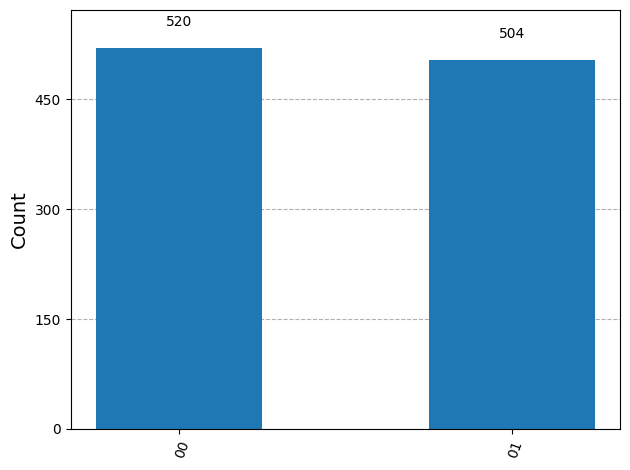

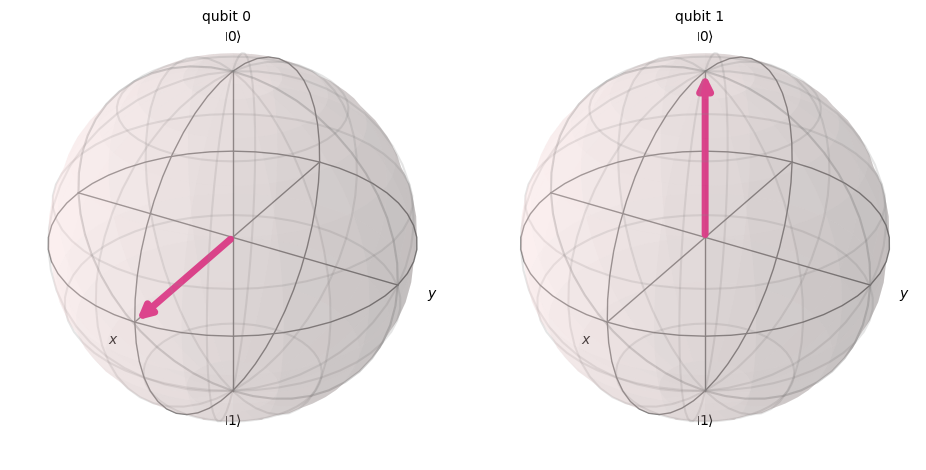

In [16]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import (
    plot_histogram,
    plot_bloch_multivector,
    array_to_latex
)

# Create circuit
qc = QuantumCircuit(2)
qc.h(0)

# Display circuit
display(qc.draw())

# Use Statevector class (no backend needed)
state = Statevector.from_instruction(qc)

# Display statevector
display(array_to_latex(state, prefix="\\text{Statevector = }"))

# Add measurements
qc.measure_all()

# Use simulator
simulator = AerSimulator()

# Run experiment
job = simulator.run(qc, shots=1024)
result = job.result()

# Plot results
display(plot_histogram(result.get_counts()))

display(plot_bloch_multivector(state))



┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

<IPython.core.display.Latex object>

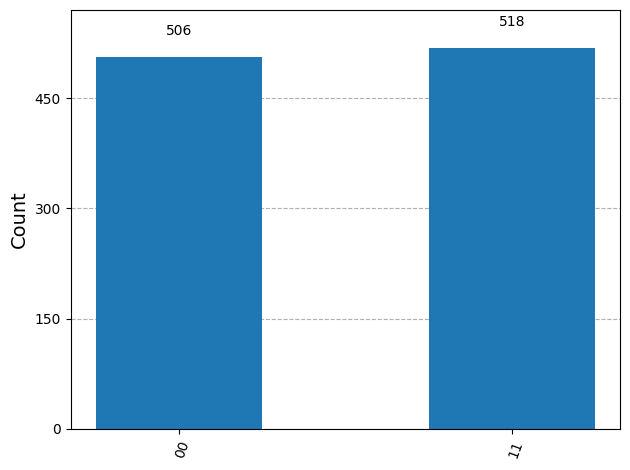

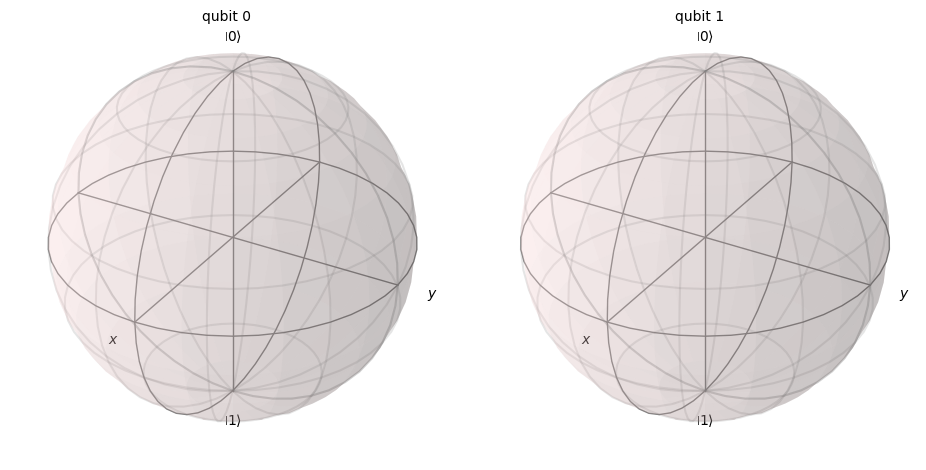

In [18]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import (
    plot_histogram,
    plot_bloch_multivector,
    array_to_latex
)

# Create entangled circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Display circuit
display(qc.draw())

# Use Statevector class (no backend needed)
state = Statevector.from_instruction(qc)

# Display statevector
display(array_to_latex(state, prefix="\\text{Statevector = }"))

# Add measurements
qc.measure_all()

# Use simulator
simulator = AerSimulator()

# Run experiment
job = simulator.run(qc, shots=1024)
result = job.result()

# Plot results
display(plot_histogram(result.get_counts()))

display(plot_bloch_multivector(state))

